In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [101]:
df = df.rename(columns={'Employment Type': 'EmploymentType'})

In [102]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [103]:
df['EmploymentType']=df['EmploymentType'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'Yes':1,'No':0})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'Yes':1,'No':0})

In [104]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data{}".format(X_train.shape))
print("Test data{}".format(X_test.shape))

Training data(1589, 4)
Test data(398, 4)


In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [108]:
X = df.drop(columns=['TravelInsurance','GraduateOrNot','FamilyMembers','EmploymentType','ChronicDiseases'])
y = df['TravelInsurance']

In [109]:
model = Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(probability=True))])
model.fit(X_train, y_train)
eval_classification(model)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.84
Recall (Test Set): 0.48
F1-Score (Test Set): 0.61
AUC (test-proba): 0.71
AUC (train-proba): 0.75


In [110]:
print("Train score:%.2f" %(model.score(X_train, y_train)))
print("Test score: %.2f" %(model.score(X_test, y_test)))
eval_classification(model)

Train score:0.79
Test score: 0.78
Accuracy (Test Set): 0.78
Precision (Test Set): 0.84
Recall (Test Set): 0.48
F1-Score (Test Set): 0.61
AUC (test-proba): 0.71
AUC (train-proba): 0.75


In [111]:
from imblearn import over_sampling,under_sampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X_train, y_train)

In [112]:
X_over = X_train
y_over = y_train

In [113]:
model = Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(probability=True))])
model.fit(X_over, y_over)
eval_classification(model)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.84
Recall (Test Set): 0.48
F1-Score (Test Set): 0.61
AUC (test-proba): 0.71
AUC (train-proba): 0.75


In [114]:
print("Train score:%.2f" %(model.score(X_over, y_over)))
print("Test score: %.2f" %(model.score(X_test, y_test)))
eval_classification(model)

Train score:0.79
Test score: 0.78
Accuracy (Test Set): 0.78
Precision (Test Set): 0.84
Recall (Test Set): 0.48
F1-Score (Test Set): 0.61
AUC (test-proba): 0.71
AUC (train-proba): 0.75


In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [117]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [118]:
grid.fit(X_over, y_over)
eval_classification(model)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.774 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.730 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.754 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.752 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.792 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [119]:
print("Train score:%.2f" %(model.score(X_over, y_over)))
print("Test score: %.2f" %(model.score(X_test, y_test)))
eval_classification(model)

Train score:0.79
Test score: 0.78
Accuracy (Test Set): 0.78
Precision (Test Set): 0.84
Recall (Test Set): 0.48
F1-Score (Test Set): 0.61
AUC (test-proba): 0.71
AUC (train-proba): 0.75


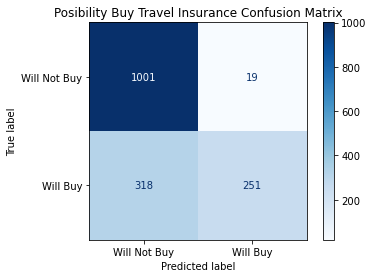

In [120]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(grid, X_under, y_under, display_labels=['Will Not Buy', 'Will Buy'], cmap='Blues')
plt.title('Posibility Buy Travel Insurance Confusion Matrix')
plt.show()